In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('ml data.xlsx')

# How big is the data?

In [3]:
df.shape

(175, 5)

# How does the data look?

In [4]:
df.sample(5)

,Timestamp,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
85,2023-11-21 15:48:41.417,168,41,88,77.00
91,2023-11-21 19:13:37.785,186,7,62.88,70.50
7,2023-11-21 14:12:51.697,153,5,0.93,0.86
33,2023-11-21 14:31:16.754,170,10,90,85.33
130,2023-11-21 19:32:57.277,5,6,93,89.00


In [5]:
df.drop('Timestamp', axis=1, inplace=True)

# Are there any null value?

In [6]:
df.isnull().sum()

HEIGHT(in cm)        0
SHOE SIZE            0
10th (percentage)    4
PUC (percentage)     6
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(169, 4)

# What are the datatypes of columns?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 5 to 174
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HEIGHT(in cm)      169 non-null    object 
 1   SHOE SIZE          169 non-null    int64  
 2   10th (percentage)  169 non-null    object 
 3   PUC (percentage)   169 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ KB


## >Converting columns to float

In [9]:
df[pd.to_numeric(df['10th (percentage)'], errors='coerce').isna()]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)


In [10]:
df[pd.to_numeric(df['HEIGHT(in cm)'], errors='coerce').isna()]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
9,185cm,10,0.86,0.88
11,168cm,9,95,85.00


In [11]:
import warnings
warnings.simplefilter('ignore')

In [12]:
df['HEIGHT(in cm)'][9] = '185'
df['HEIGHT(in cm)'][11] = '168'
df['HEIGHT(in cm)'] = df['HEIGHT(in cm)'].astype('float')
df['10th (percentage)'] = df['10th (percentage)'].astype('float')

# How is the correlation between columns?

<AxesSubplot:>

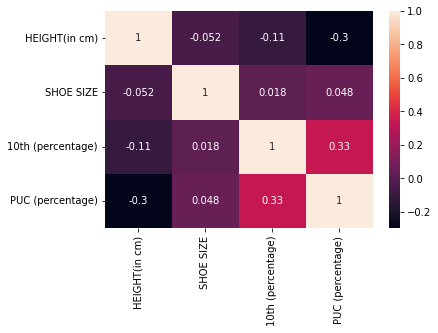

In [13]:
sns.heatmap(df.corr(), annot=True)

# How does data look mathematically?

In [14]:
df.describe()

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
count,169.000000,169.000000,169.000000,169.000000
mean,151.554320,9.390533,84.122775,80.750621
std,92.906394,7.265470,36.823705,14.748240
min,1.590000,1.000000,0.860000,0.860000
25%,155.000000,7.000000,78.000000,76.000000
50%,164.000000,8.000000,86.000000,84.000000
75%,173.000000,10.000000,91.000000,89.000000
max,1000.000000,69.000000,508.000000,99.000000


## >Removing outliers from 10th and PUC

In [15]:
condition = ((df['10th (percentage)'] < 40) | (df['10th (percentage)'] > 100))
df[condition]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
5,175.0,9,508.00000,80.00000
7,153.0,5,0.93000,0.86000
9,185.0,10,0.86000,0.88000
10,1000.0,1,0.99999,0.88888
13,100.0,4,0.99000,99.00000
23,161.0,7,7.80000,8.10000


In [16]:
def float_to_percentage(x):
    if x <= 1:
        return 100*x
    return x

In [17]:
df['10th (percentage)'] = df['10th (percentage)'].apply(float_to_percentage)
df['PUC (percentage)'] = df['PUC (percentage)'].apply(float_to_percentage)

In [18]:
condition = ((df['10th (percentage)'] < 40) | (df['10th (percentage)'] > 100))
df[condition]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
5,175.0,9,508.0,80.0
23,161.0,7,7.8,8.1


In [19]:
df = df.drop(df[condition].index)
df.shape

(167, 4)

## >Removing outliers from HEIGHT

In [20]:
condition = ((df['HEIGHT(in cm)'] < 120) | (df['HEIGHT(in cm)'] > 220))
df[condition]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
10,1000.00,1,99.999,88.888
12,69.00,69,69.000,69.000
13,100.00,4,99.000,99.000
27,5.40,9,90.000,89.000
34,5.90,10,85.000,90.000
60,5.50,7,60.000,70.000
63,4.60,5,89.200,85.800
66,6.00,10,86.000,88.000
71,5.80,8,98.000,88.000
97,5.00,7,75.000,81.000


In [21]:
def height_conversion(x):
    if x < 7.5:
        feet = int(x)
        inches = (x - feet) * 10
        return feet * 30.48 + inches * 2.54
    return x

In [22]:
df['HEIGHT(in cm)'] = df['HEIGHT(in cm)'].apply(height_conversion)

In [23]:
# condition = ((df['HEIGHT(in cm)'] < 120) | (df['HEIGHT(in cm)'] > 220))
condition = ((df['HEIGHT(in cm)'] < 142) | (df['HEIGHT(in cm)'] > 220))
df[condition]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
10,1000.000,1,99.999,88.888
12,69.000,69,69.000,69.000
13,100.000,4,99.000,99.000
63,137.160,5,89.200,85.800
113,128.000,6,99.360,93.000
116,590.000,8,77.000,89.000
122,140.000,10,60.000,80.000
123,129.540,5,90.880,90.830
126,45.466,6,86.000,84.000
139,57.000,7,78.000,78.000


In [24]:
df = df.drop(df[condition].index)
df.shape

(157, 4)

## >Removing outliers from SHOE SIZE

In [25]:
condition = ((df['SHOE SIZE'] < 6) | (df['SHOE SIZE'] > 13))
df[condition]

,HEIGHT(in cm),SHOE SIZE,10th (percentage),PUC (percentage)
7,153.0,5,93.0,86.00
70,157.0,5,79.0,86.00
85,168.0,41,88.0,77.00
120,164.0,5,83.0,76.00
136,160.0,40,92.0,90.00
141,157.0,5,89.0,78.00
150,164.0,40,91.0,94.66
151,151.0,37,69.2,83.30
161,169.0,40,97.6,96.30


In [26]:
df = df.drop(df[condition].index)
df.shape

(148, 4)

# Correlation

<AxesSubplot:>

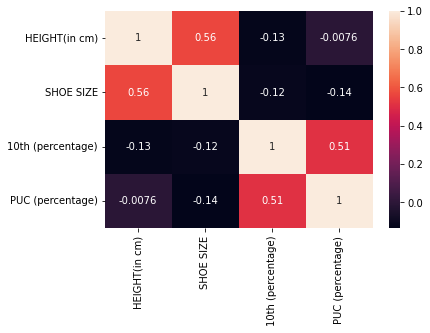

In [27]:
sns.heatmap(df.corr(), annot=True)

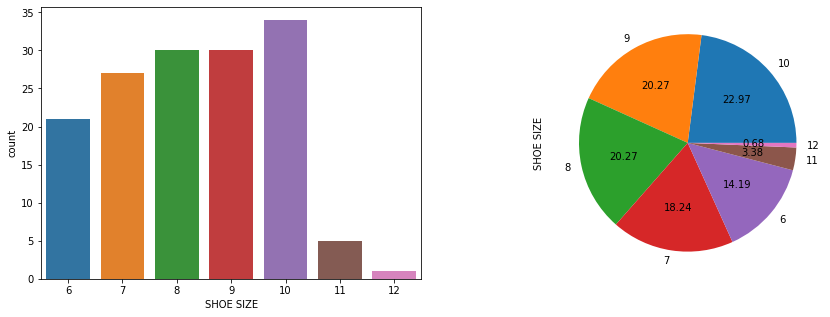

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='SHOE SIZE', data=df, ax=ax[0])
df['SHOE SIZE'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[1])
plt.show()

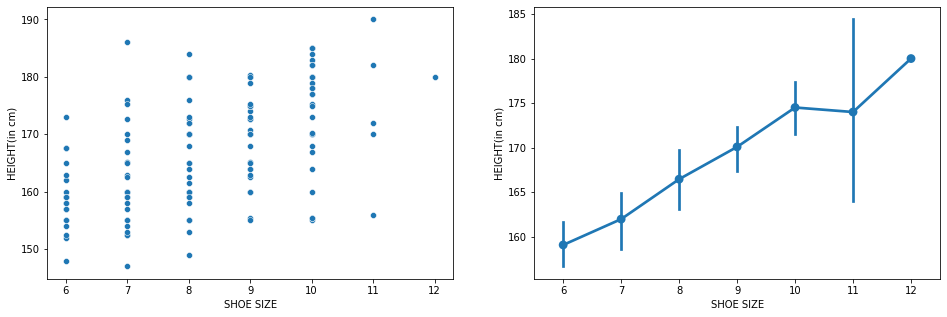

In [29]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x='SHOE SIZE',y='HEIGHT(in cm)', data=df, ax=ax[0])
sns.pointplot(x='SHOE SIZE',y='HEIGHT(in cm)', data=df, ax=ax[1])
plt.show()

<AxesSubplot:xlabel='10th (percentage)', ylabel='PUC (percentage)'>

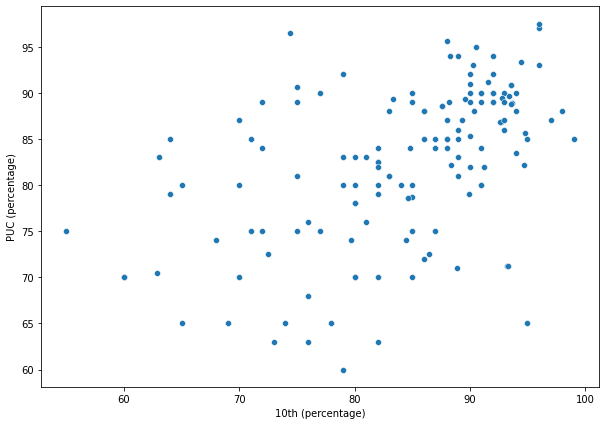

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='10th (percentage)', y='PUC (percentage)', data=df)

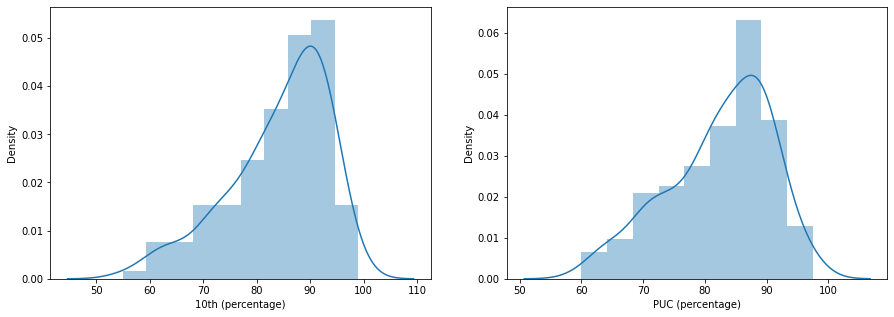

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['10th (percentage)'], ax=ax[0])
sns.distplot(df['PUC (percentage)'], ax=ax[1])
plt.show()

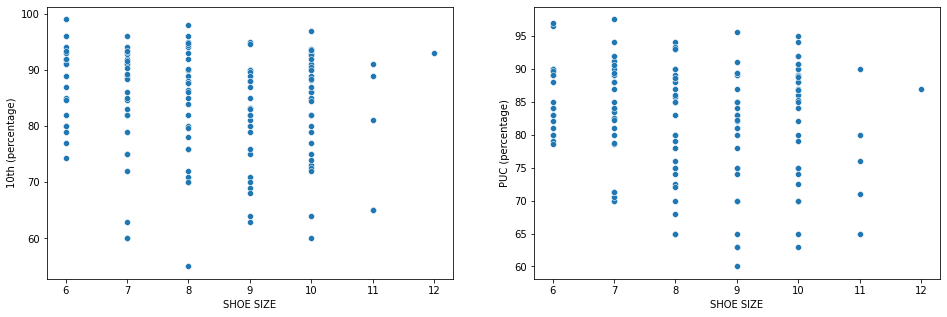

In [32]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x='SHOE SIZE', y='10th (percentage)', data=df, ax=ax[0])
sns.scatterplot(x='SHOE SIZE', y='PUC (percentage)', data=df, ax=ax[1])
plt.show()

<AxesSubplot:xlabel='10th (percentage)', ylabel='PUC (percentage)'>

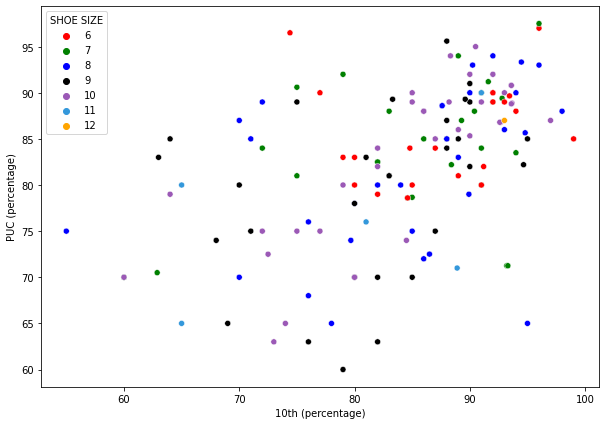

In [33]:
plt.figure(figsize=(10,7))
color_set = ["red","green","blue","black","#9b59b6", "#3498db","orange"]
sns.scatterplot(x='10th (percentage)', y='PUC (percentage)', hue='SHOE SIZE', palette=color_set, data=df)

<AxesSubplot:xlabel='HEIGHT(in cm)', ylabel='10th (percentage)'>

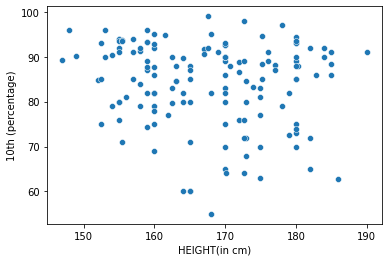

In [34]:
sns.scatterplot(x='HEIGHT(in cm)', y='10th (percentage)', data=df)

# Handling Outliers

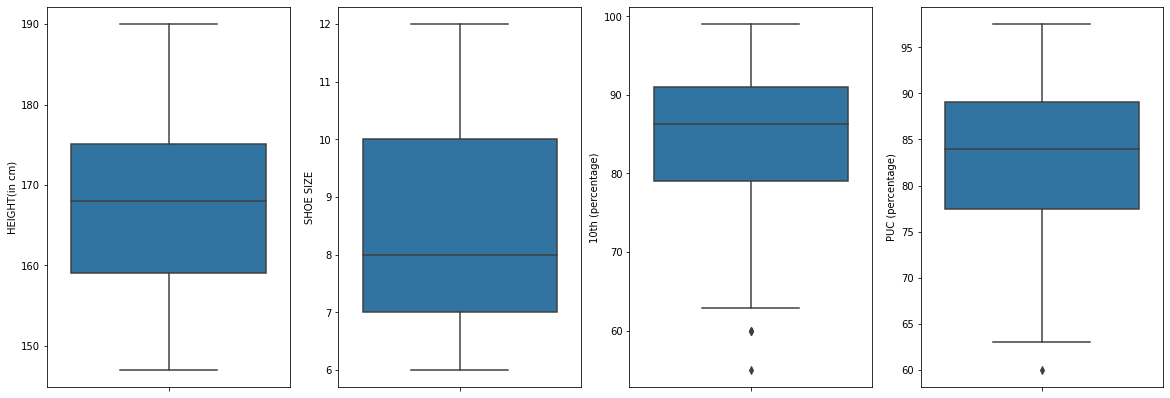

In [35]:
fig, ax = plt.subplots(1,4,figsize=(20,7))
for i in range(4):
    sns.boxplot(y=df.columns[i], data=df, ax=ax[i])

# Model

In [36]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['10th (percentage)'], df['PUC (percentage)'])

In [37]:
r_value ** 2

0.26224260084575535

In [38]:
slope

0.45939183311570086

In [39]:
intercept

43.76444090334632

In [40]:
r_value

0.5120962808356992

In [41]:
p_value

2.8804396113669578e-11

In [42]:
std_err

0.06376935253481043

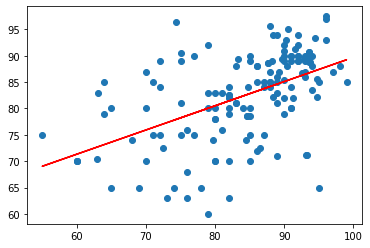

In [43]:
def predict(x):
    return slope * x + intercept

fitLine = predict(df['10th (percentage)'])

plt.scatter(df['10th (percentage)'], df['PUC (percentage)'])
plt.plot(df['10th (percentage)'], fitLine, c='r')
plt.show()


# Train Test Split

In [44]:
X = df['10th (percentage)'].values.reshape(148,1)
Y = df['PUC (percentage)'].values.reshape(148,1)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((118, 1), (30, 1))

# Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.coef_

array([[0.44827554]])

In [50]:
lr.intercept_

array([44.28716494])

# Prediction and r2_score

In [51]:
y_pred = lr.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.3226389357414514

In [53]:
y_pred = lr.predict(df['10th (percentage)'].values.reshape(148,1))
y_plot = []
for i in range(len(y_pred)):
    y_plot.append(y_pred[i][0])
y_pred = np.array(y_plot)

<AxesSubplot:xlabel='10th (percentage)', ylabel='PUC (percentage)'>

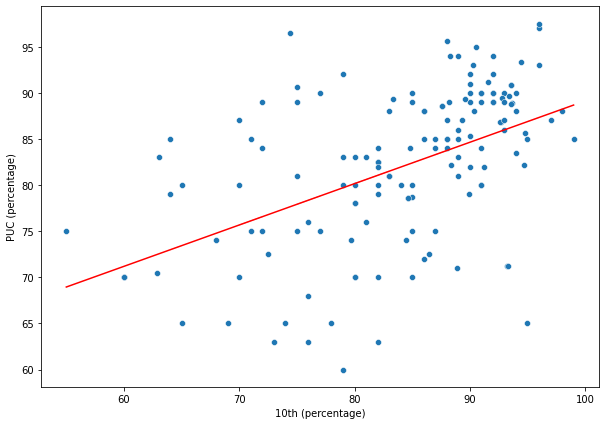

In [54]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='10th (percentage)', y='PUC (percentage)', data=df)
sns.lineplot(x='10th (percentage)', y=y_pred, data=df, color='red')